In [2]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_dataset = pd.read_csv('/content/drive/MyDrive/faults.csv')
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [4]:
df_dataset.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
faults_norm = (df_dataset - df_dataset.min()) / (df_dataset.max() - df_dataset.min())

In [6]:
faults_norm.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.334977,0.359254,0.126645,0.126648,0.012393,0.010515,0.004516,0.017778,0.416496,0.431452,0.409454,0.400309,0.599691,0.148991,0.333315,0.438821,0.567175,0.036438,0.604838,0.803985,0.575734,0.448807,0.373115,0.329507,0.541831,0.528699,0.529422,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,0.305390,0.291180,0.136706,0.136707,0.033858,0.028832,0.023496,0.044197,0.158297,0.086532,0.254987,0.490087,0.490087,0.211869,0.301157,0.145420,0.273327,0.067430,0.246831,0.246189,0.482352,0.161577,0.173673,0.106686,0.252619,0.090656,0.385303,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029912,0.110006,0.035786,0.035788,0.000537,0.001244,0.000661,0.000800,0.310345,0.402778,0.231041,0.000000,0.000000,0.000000,0.060691,0.334569,0.355954,0.005833,0.403206,0.576293,0.000000,0.332459,0.252064,0.253411,0.331719,0.489884,0.146652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.255132,0.270919,0.092244,0.092244,0.001127,0.002297,0.001322,0.001635,0.443350,0.416667,0.241623,0.000000,1.000000,0.115385,0.228396,0.436593,0.551881,0.009835,0.631088,0.944725,1.000000,0.397239,0.315567,0.310470,0.547839,0.527666,0.439614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617595,0.624927,0.167658,0.167658,0.005372,0.007849,0.004518,0.007140,0.522167,0.476852,0.746032,1.000000,1.000000,0.153846,0.576568,0.531412,0.816678,0.025160,0.797078,1.000000,1.000000,0.535339,0.439039,0.406791,0.757855,0.568129,0.999773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
faults_shuffle = faults_norm.sample(frac = 1)
print(faults_shuffle[:5])

      X_Minimum  X_Maximum  Y_Minimum  ...  Dirtiness  Bumps  Other_Faults
467    0.022874   0.110006   0.121728  ...        0.0    0.0           0.0
606    0.024047   0.124049   0.119320  ...        0.0    0.0           0.0
1596   0.761877   0.761264   0.029183  ...        0.0    0.0           1.0
1710   0.488563   0.498537   0.071720  ...        0.0    0.0           1.0
914    0.795894   0.799298   0.259746  ...        0.0    1.0           0.0

[5 rows x 34 columns]


In [8]:
faults_np = faults_shuffle.to_numpy()
print(type(faults_np))

<class 'numpy.ndarray'>


In [9]:
train_ratio = 0.92
input_cnt   = 27
output_cnt  = 7

train_idx = int(len(faults_np) * train_ratio)
print("train_idx : ", train_idx)

# train_X, train_Y = faults_np[ 행 , 열 ]
train_X, train_Y = faults_np[:train_idx , : -output_cnt ], faults_np[:train_idx , -output_cnt : ]
test_X, test_Y   = faults_np[train_idx: , : -output_cnt ], faults_np[train_idx: , -output_cnt : ]

print(train_X.shape)
print(train_Y.shape)
print("=======================")
print(test_X.shape)
print(test_Y.shape)

train_idx :  1785
(1785, 27)
(1785, 7)
(156, 27)
(156, 7)


In [10]:
GJ_NET_Model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(units = 48,
                                                          activation = 'elu',
                                                          input_shape = (27,)),
                                    tf.keras.layers.Dense(units = 24,
                                                          activation = 'elu'),
                                    tf.keras.layers.Dense(units = 12,
                                                          activation = 'elu'),
                                    tf.keras.layers.Dense(units = 7,
                                                          activation = 'softmax')
])

In [11]:
GJ_NET_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 91        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


In [12]:
GJ_NET_Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss = 'categorical_crossentropy')

In [13]:
history_1 = GJ_NET_Model.fit(train_X, train_Y,
                             epochs = 400, batch_size = 10)

Epoch 1/400
179/179 [==============================] - 1s 1ms/step - loss: 1.1466
Epoch 2/400
179/179 [==============================] - 0s 1ms/step - loss: 0.9088
Epoch 3/400
179/179 [==============================] - 0s 1ms/step - loss: 0.8364
Epoch 4/400
179/179 [==============================] - 0s 1ms/step - loss: 0.8077
Epoch 5/400
179/179 [==============================] - 0s 1ms/step - loss: 0.8057
Epoch 6/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7492
Epoch 7/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7266
Epoch 8/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7520
Epoch 9/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7241
Epoch 10/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7290
Epoch 11/400
179/179 [==============================] - 0s 1ms/step - loss: 0.7032
Epoch 12/400
179/179 [==============================] - 0s 1ms/step - loss: 0.6734
Epoch 13/400


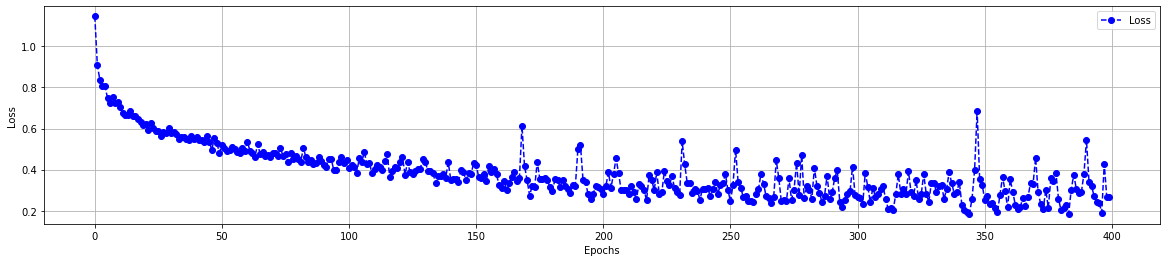

In [14]:
plt.figure(figsize=(20,4))
plt.plot(history_1.history['loss'], '--o', color = 'blue', label = 'Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [15]:
GJ_NET_Model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 2ms/step - loss: 1.3439


1.3439245223999023

In [16]:
pred_Y = GJ_NET_Model.predict(test_X)
print(pred_Y)

[[2.4994881e-01 8.1051130e-06 1.3484001e-08 ... 9.3625914e-08
  1.6408065e-06 7.5004137e-01]
 [4.9294907e-34 0.0000000e+00 2.5694542e-18 ... 0.0000000e+00
  5.3081324e-13 9.3033955e-18]
 [2.0763984e-02 1.5495715e-02 1.0746303e-05 ... 7.0334214e-01
  4.0107697e-02 2.1984223e-01]
 ...
 [2.2710014e-13 1.4441115e-21 3.4862420e-18 ... 6.7227168e-10
  1.8178085e-05 9.9998176e-01]
 [4.4324500e-09 1.1113894e-14 5.4406803e-14 ... 1.3907537e-06
  9.5098116e-04 9.9904734e-01]
 [1.4021972e-03 8.5802847e-01 7.1515821e-10 ... 2.4413316e-08
  6.1454535e-02 7.8547329e-02]]


In [17]:
pred_Y = np.argmax(pred_Y, axis = 1)
print(pred_Y)

[6 3 4 6 0 5 5 6 6 5 2 2 2 6 0 6 4 2 6 2 2 2 2 6 6 6 2 1 0 6 1 6 6 5 6 2 5
 1 2 6 6 1 6 5 6 1 4 4 6 2 6 0 1 3 5 5 5 2 6 1 6 5 5 2 6 5 6 5 5 2 0 4 5 6
 6 3 0 6 3 6 5 6 2 6 2 6 6 0 5 6 2 5 0 6 1 2 3 5 6 5 5 5 6 5 6 5 3 1 4 0 4
 1 6 1 2 1 2 5 1 5 3 0 2 6 2 2 5 5 1 6 5 3 6 6 6 5 2 0 0 6 2 3 4 6 5 5 6 5
 6 2 5 5 2 6 6 1]


In [19]:
test_Y = np.argmax(test_Y, axis = 1)
print(test_Y)

[6 3 5 6 0 5 0 6 6 5 2 2 2 6 6 6 4 2 6 2 2 2 2 6 6 5 2 1 0 6 1 5 5 6 6 2 6
 1 2 6 6 1 6 5 6 1 4 6 5 2 5 6 1 3 5 5 5 2 5 6 6 6 5 2 6 6 5 0 5 2 6 4 5 6
 0 3 0 6 3 5 5 6 2 6 2 6 5 0 5 6 2 6 6 5 1 1 3 1 6 5 5 5 0 5 6 5 3 1 4 0 6
 1 0 1 2 1 2 5 1 5 3 6 6 6 2 2 5 5 1 6 6 6 6 6 6 5 2 0 0 6 2 3 4 5 5 0 5 5
 5 2 5 6 2 6 6 6]


In [20]:
acc = np.mean(np.equal(pred_Y, test_Y))
print("GJ_NET_Model Acc : {} Score".format(np.round(acc * 100,3)))

GJ_NET_Model Acc : 74.359 Score
